# Cancer Prediction Based on Medical and Lifestyle Information

Author: Tran Hoang Thuc Cao (67121302)

Course Project, UC Irvine, Math 10, S24

I would not like to post my notebook on the course’s website. 


# Introduction

Cancer is one of the most feared and prevalent diseases in modern society, posing a significant threat to public health worldwide. Despite advances in medical research and technology, a complete cure for cancer remains elusive. This project aims to explore into the intricate relationship between cancer and various medical and lifestyle factors, such as age, Body Mass Index (BMI), genetic risk, physical activity, alcohol intake, and gender. By analyzing these variables, we seek to gain a deeper understanding of how they influence the likelihood of developing cancer. The insights derived from this analysis can be pivotal in enhancing early diagnosis and prevention strategies, ultimately contributing to more effective management of this formidable disease. Through comprehensive data analysis, we hope to illuminate patterns and correlations that could inform public health policies and individual lifestyle choices, thereby reducing the overall burden of cancer in society.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

# Data Description

In [3]:
data = pd.read_csv(r'C:\Users\Catherine Cao\Downloads\cancer_data.csv')
data.sample(20) # Randomly seleted 20 rows in the dataset

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
1361,48,0,22.598563,0,0,5.971166,4.932070,0,0
932,55,1,21.894189,1,1,1.941288,0.015104,0,1
333,76,0,36.833073,0,0,5.300523,2.286152,0,0
38,46,0,32.378614,0,0,7.595201,2.087241,0,0
244,61,1,27.805548,0,0,9.517024,2.144437,0,0
642,71,1,21.507171,1,0,7.901314,4.366957,1,1
146,60,1,24.188361,0,0,6.919274,4.679971,0,0
701,53,0,17.873325,1,0,4.078942,3.989012,1,1
270,21,1,30.616589,1,1,6.477201,4.529720,0,1
291,75,1,20.615390,0,0,2.862799,4.345495,0,0


**Explanation of the columns in dataset
Dataset from Kaggle (https://www.kaggle.com/datasets/rabieelkharoua/cancer-prediction-dataset**

This dataset contains 1500 patients' medical and lifestyle information. These information is used to predict the presene of cancer from various features.

1) __Age__: Integer values representing the patient's age, ranging from 20 to 80.
2) __Gender__: Binary values representing gender, where 0 indicates Male and 1 indicates Female.
3) __BMI__: Continuous values representing Body Mass Index, ranging from 15 to 40.
4) __Smoking__: Binary values indicating smoking status, where 0 means No and 1 means Yes.
5) __GeneticRisk__: Categorical values representing genetic risk levels for cancer, with 0 indicating Low, 1 indicating Medium, and 2 indicating High.
6) __PhysicalActivity__: Continuous values representing the number of hours per week spent on physical activities, ranging from 0 to 10.
7) __AlcoholIntake__: Continuous values representing the number of alcohol units consumed per week, ranging from 0 to 5.
8) __CancerHistory__: Binary values indicating whether the patient has a personal history of cancer, where 0 means No and 1 means Yes.
9) __Diagnosis__: Binary values indicating the cancer diagnosis status, where 0 indicates No Cancer and 1 indicates Cancer.

A brief insight on the descriptive statistics of 5 features, excluding binary features (gender, smoking, cancer history, and diagnoisis)

In [5]:
specified_columns = ['Age', 'BMI', 'GeneticRisk', 'PhysicalActivity', 'AlcoholIntake']
summary_stats_specified = data[specified_columns].describe(include='all')

print(summary_stats_specified)


               Age          BMI  GeneticRisk  PhysicalActivity  AlcoholIntake
count  1500.000000  1500.000000  1500.000000       1500.000000    1500.000000
mean     50.320000    27.513321     0.508667          4.897929       2.417987
std      17.640968     7.230012     0.678895          2.866162       1.419318
min      20.000000    15.000291     0.000000          0.002410       0.001215
25%      35.000000    21.483134     0.000000          2.434609       1.210598
50%      51.000000    27.598494     0.000000          4.834316       2.382971
75%      66.000000    33.850837     1.000000          7.409896       3.585624
max      80.000000    39.958688     2.000000          9.994607       4.987115


# Visualizing Individual Medical Factors and Lifestyle Factors on the Presence of Cancer

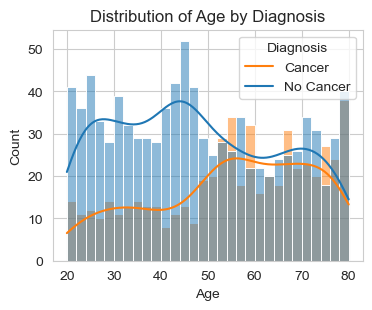

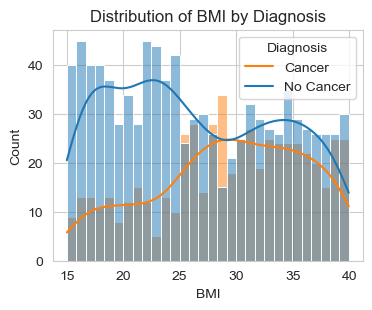

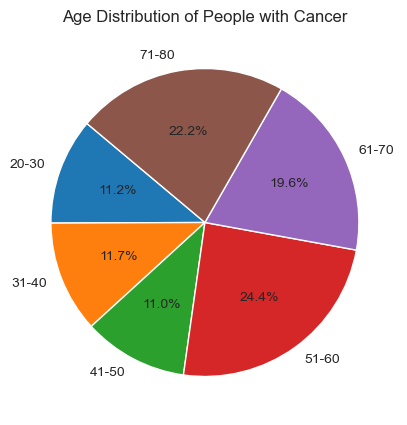

In [6]:
data.dropna(inplace=True)  # Drop rows with missing values

sns.set_style("whitegrid")

medical_factors = ['Age', 'BMI']

lifestyle_factors = ['Smoking', 'AlcoholIntake', 'PhysicalActivity']

# Combine the target variable (Diagnosis) with the features
data_combined = pd.concat([data[medical_factors + lifestyle_factors], data['Diagnosis']], axis=1)

for factor in medical_factors:
    plt.figure(figsize=(4, 3))
    sns.histplot(data=data_combined, x=factor, hue='Diagnosis', kde=True, bins=30)
    plt.title(f"Distribution of {factor} by Diagnosis")
    plt.xlabel(factor)
    plt.ylabel("Count")
    plt.legend(title="Diagnosis", labels=["Cancer", "No Cancer"])
    plt.show()

cancer_data = data[data['Diagnosis'] == 1].copy() 

bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-30', '31-40', '41-50', '51-60', '61-70', '71-80']
cancer_data.loc[:, 'AgeGroup'] = pd.cut(cancer_data['Age'], bins=bins, labels=labels, right=False)

age_group_counts = cancer_data['AgeGroup'].value_counts().sort_index()

plt.figure(figsize=(5, 5))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Age Distribution of People with Cancer')
plt.show()

__Above are two graphs about the distribution of "Age" and "BMI" by Diagnosis (Cancer/No Cancer).__
- __For the first graph__, "Distribution of Age by Diagnosis," we observe that out of 1500 data points, the majority of people diagnosed with cancer fall within the age group of 50-80. To analyze this further, I will focus on specific age groups (20s, 30s, etc.) to determine which group has more patients diagnosed with cancer. I sort out the individuals diagnosed with cancer and create a pie chart to illustrate the age distribution within this population. This will help us identify which specific age groups are more affected by cancer. With this deeper analysis, we can see that 24.4% patients diagnosed with cancer are from 51-60 years old and is the age group with the highest percent.
- __For the second graph__, "Distribution of BMI by Diagnosis," we observe that, people with BMI score higher than 28 are more likely to diagnosed with cancer. For reference, we have 
BMI Categories:
Underweight = <18.5
Normal weight = 18.5–24.9
Overweight = 25–29.9
Obesity = BMI of 30 or greater
- This implies that people who are overweight and obese have a higher risk of being diagnosed with cancer.

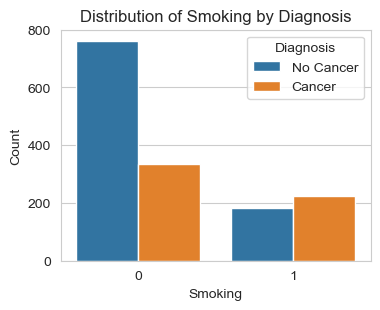

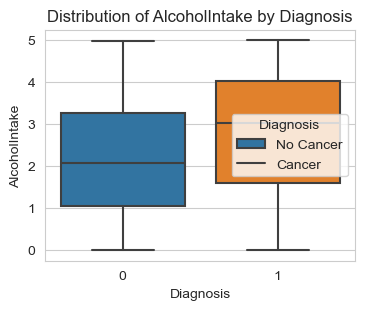

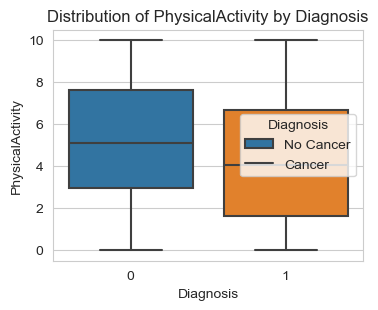

In [7]:
for factor in lifestyle_factors:
    plt.figure(figsize=(4, 3))
    if factor == 'AlcoholIntake' or factor == 'PhysicalActivity':
        sns.boxplot(data=data_combined, x='Diagnosis', y=factor)
        plt.title(f"Distribution of {factor} by Diagnosis")
        plt.xlabel("Diagnosis")
        plt.ylabel(factor)
    else:
        sns.countplot(data=data_combined, x=factor, hue='Diagnosis')
        plt.title(f"Distribution of {factor} by Diagnosis")
        plt.xlabel(factor)
        plt.ylabel("Count")
    plt.legend(title="Diagnosis", labels=["No Cancer", "Cancer"])
    plt.show()


Next, I am analyzing the three lifestyle factors: __'Smoking', 'Alcohol Intake', and 'Physical Activity'__. The graphs give us solid conclusions:

- People who smoke are very likely to be diagnosed with cancer. This is quite common knowledge, but looking at the count of people who do not smoke, we see a significant difference: more than 2/3 of non-smokers do not have cancer, while more than 50% patients diagnosed with cancer are smokers.
- People with a high score of Alcohol Intake are more likely to be diagnosed with cancer.
- People who work out or engage in physical activity are less likely to be diagnosed with cancer.

# Regression Models: The Best Model

In this step, I am using __cross validation__ to identify the Best Regression Model with the smallest Mean Squared Error.

In [10]:
scorer = make_scorer(mean_squared_error, greater_is_better=False)

X = data.drop("Diagnosis", axis=1)
y = data["Diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1500)

models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
}

results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=scorer)
    results[name] = -cv_scores.mean()  
    
for name, score in results.items():
    print(f"{name}: Mean Squared Error = {score:.2f}")

best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print(f"\nBest Model: {best_model_name}")
print(f"Test Mean Squared Error = {test_mse:.2f}")

Linear Regression: Mean Squared Error = 0.13
Lasso Regression: Mean Squared Error = 0.23
Ridge Regression: Mean Squared Error = 0.13
Decision Tree Regression: Mean Squared Error = 0.16
Random Forest Regression: Mean Squared Error = 0.08

Best Model: Random Forest Regression
Test Mean Squared Error = 0.08


The result indicates that the __Best Model is Random Forest Regression__ with the __Test Mean Squared Error = 0.08.__
With this result, I, then, use Random Forest Regression and Random Forest Classifier to analyze the dataset further.
I set X is all the factors, Y is Diagnosis. Then I start to split data into training and testing sets.

Accuracy: 0.9233333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       180
           1       0.95      0.85      0.90       120

    accuracy                           0.92       300
   macro avg       0.93      0.91      0.92       300
weighted avg       0.93      0.92      0.92       300

Confusion Matrix:
[[175   5]
 [ 18 102]]


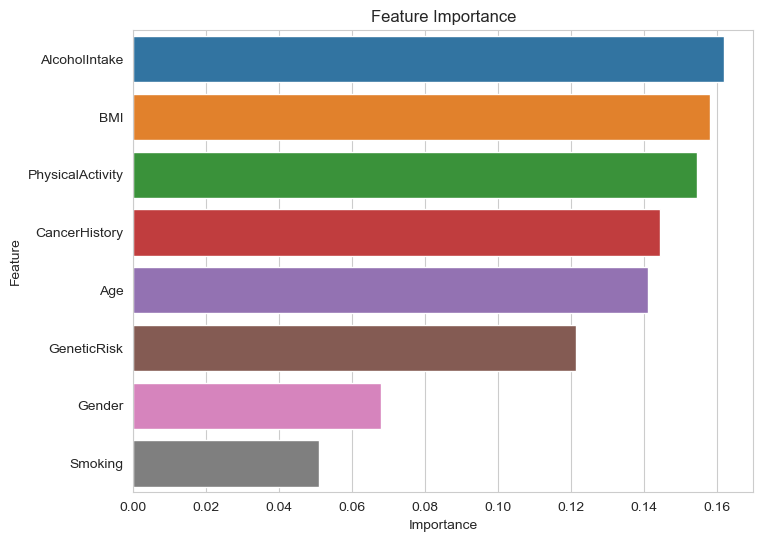

In [12]:
data.dropna(inplace=True)  

X = data.drop("Diagnosis", axis=1)
y = data["Diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1500)

model = RandomForestClassifier(n_estimators=1500, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

feature_importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


- We have the accuracy is upto __91.3%__
- Confusion Matrix is shown as well, the prediction is quite close to the true value.
- Especially there is a graph indicate the importance factors out of the factors from two categories. __Top 5 are, in order, Alcohol Intake, BMI, Physical Activity, Cancer History and Age.__



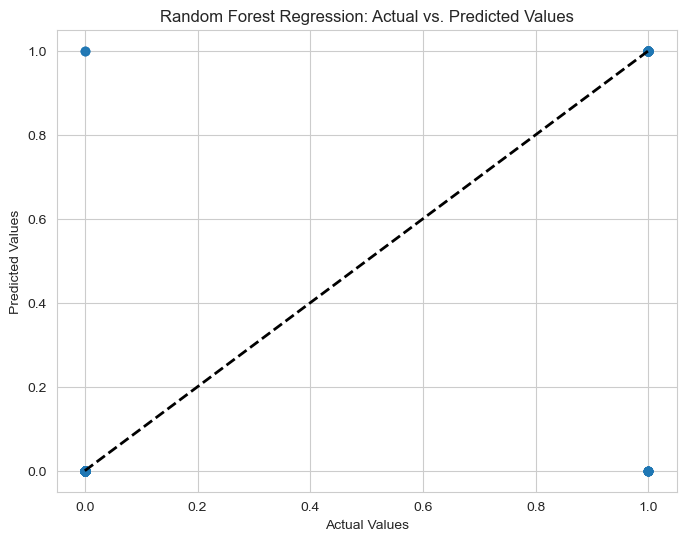

In [14]:
# Plotting predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression: Actual vs. Predicted Values")
plt.show()


# Extra: Correlation Matrix

I create a Correlation matrix using heatmap to represent the correlation between all the factors. No significant correlation found. Only the correlation of each factor and "diagnosis" matters.

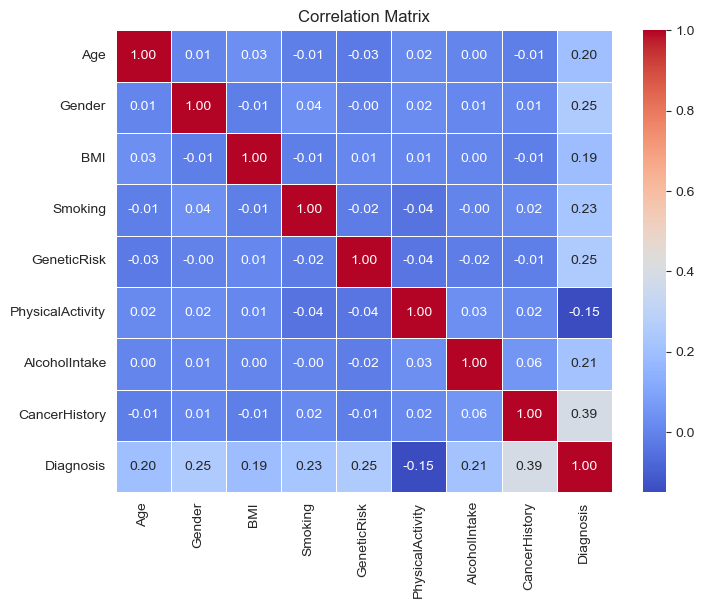

In [15]:
corr_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# K-nearest neighbors Regression

- Above, I have not checked the kNN regression, so in this section, we will run the kNN-regression on the dataset to see if it is better than the Best Model I chose before.
- The MSE of this regression is about 0.197 which is not as good (in term of MSE) as Random Forest Regression (MSE=0.08)

KNN Regression Mean Squared Error (Test set): 0.21403466666666668


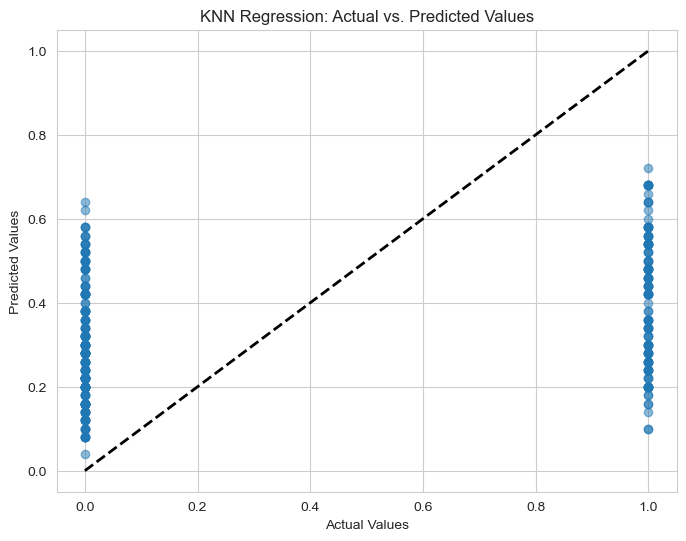

In [16]:
knn_regressor = KNeighborsRegressor(n_neighbors=50)  

knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

test_mse = mean_squared_error(y_test, y_pred)
print("KNN Regression Mean Squared Error (Test set):", test_mse)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("KNN Regression: Actual vs. Predicted Values")
plt.show()


# K-means Cluster (BMI vs Age)

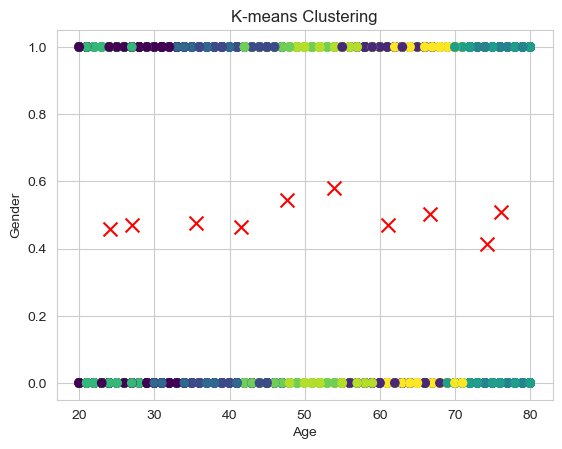

In [17]:
numeric_data = data.select_dtypes(include=[np.number])

# Initialize KMeans object with the chosen number of clusters
kmeans = KMeans(n_clusters=10, n_init=10)

# Fit KMeans object to the data
kmeans.fit(numeric_data)

# Get cluster labels
cluster_labels = kmeans.labels_

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

plt.scatter(numeric_data.iloc[:, 0], numeric_data.iloc[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=100, c='red')
plt.xlabel(numeric_data.columns[0])  
plt.ylabel(numeric_data.columns[1])  
plt.title('K-means Clustering')
plt.show()

# Conclusions and Key insights

In this study, we analyzed various medical and lifestyle factors to understand their influence on the likelihood of being diagnosed with cancer. Here are the key findings and insights derived from the analysis:

 __1) Age Distribution and Cancer Diagnosis:__

The majority of individuals diagnosed with cancer fall within the age group of 50-80.
A more detailed analysis revealed that 24.4% of patients diagnosed with cancer are between 51-60 years old, making it the age group with the highest percentage of cancer diagnoses.

__2) BMI and Cancer Risk:__

Individuals with a BMI higher than 28 are more likely to be diagnosed with cancer. This aligns with the BMI categories indicating that people who are overweight (BMI 25-29.9) and obese (BMI of 30 or greater) have a higher risk of cancer.

__3) Lifestyle Factors:__

Smoking: More than 50% of the patients diagnosed with cancer are smokers, highlighting a significant correlation between smoking and cancer. Conversely, over 2/3 of non-smokers do not have cancer.

Alcohol Intake: High alcohol intake is associated with an increased likelihood of cancer diagnosis.

Physical Activity: Individuals who engage in regular physical activity are less likely to be diagnosed with cancer, underscoring the protective benefits of physical exercise.

__4) Model Performance:__

The Random Forest Regression model was identified as the best predictive model with a Test Mean Squared Error (MSE) of 0.08 and an accuracy of 91.3%.
The model's confusion matrix indicates that the predictions are closely aligned with the true values.
Key factors influencing the diagnosis, in order of importance, are Alcohol Intake, BMI, Physical Activity, Cancer History, and Age.
The correlation matrix and heatmap showed no significant correlations between the factors, except for their individual correlations with the diagnosis outcome.

__5) Comparison with kNN Regression:__

The k-Nearest Neighbors (kNN) regression was also tested but resulted in a higher MSE of 0.197, making it less effective compared to the Random Forest Regression.

# References

1) Data on Kaggle: https://www.kaggle.com/datasets/rabieelkharoua/cancer-prediction-dataset
2) Format and Struture inspired by a student project "Makeup Foundation Shades Analysis"
https://christopherdavisuci.github.io/UCI-Math-10-S23/Proj/StudentProjects/LoulouVivianMahfouz.html
3) BMI categories: https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmicalc.htm
4) Codes: Class Lecture Note and Chat GPT (https://chatgpt.com/)